In [1]:
import numpy as np
import pandas as pd
 
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #or try with 'latin1'

 #Display the first few rows
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
401,ham,Dear how is chechi. Did you talk to her,NaN,NaN,NaN
4680,ham,Are you staying in town ?,NaN,NaN,NaN
4064,ham,Dont kick coco when he's down,NaN,NaN,NaN
5457,ham,Arun can u transfr me d amt,NaN,NaN,NaN
4894,spam,Want the latest Video handset? 750 anytime any...,NaN,NaN,NaN


In [2]:
df.shape

(5572, 5)

In [3]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# # 1. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5) 

,v1,v2
79,ham,Its not the same here. Still looking for a job...
2047,ham,No de. But call me after some time. Ill tell y...
5041,spam,Jamster! To get your free wallpaper text HEART...
4650,spam,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...
213,ham,Yup... How Ì_ noe leh...


In [7]:
 # renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1239,ham,Hope you are having a great new semester. Do w...
504,spam,+123 Congratulations - in this week's competit...
3405,ham,\HEY DAS COOL... IKNOW ALL 2 WELLDA PERIL OF S...
4678,ham,Sry da..jst nw only i came to home..
3410,ham,Only once then after ill obey all yours.


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [19]:
# check for duplicate values
df.duplicated().sum()

0

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

# 2.EDA


In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [22]:
# !pip install matplotlib


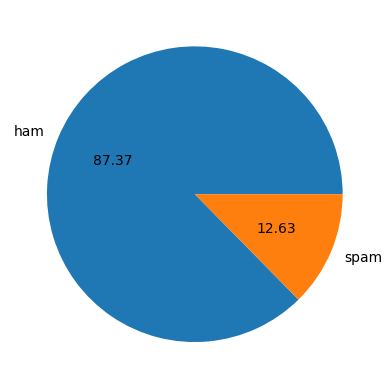

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SUMIT KUMAR
[nltk_data]     THAKUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# num of characters
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
 df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [44]:
# !pip install seaborn


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

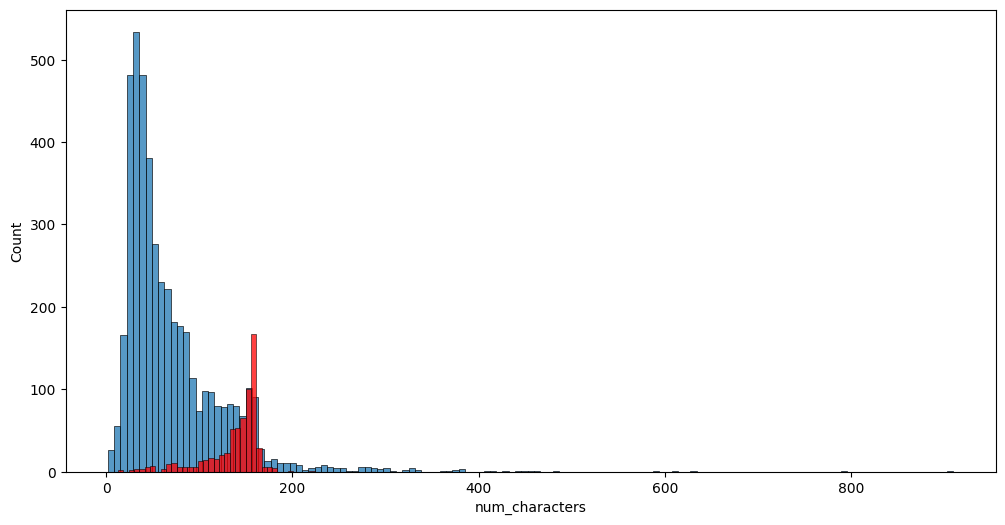

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

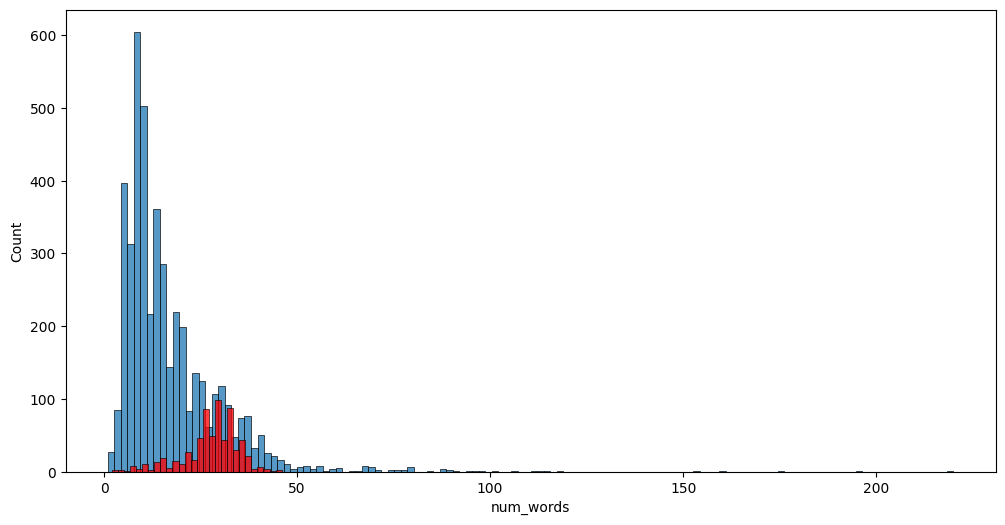

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

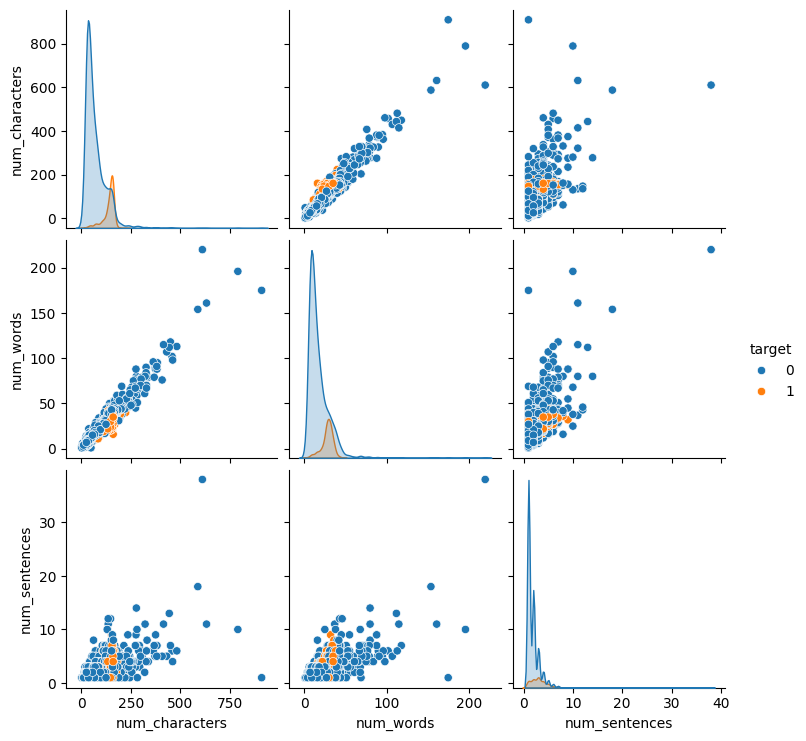

In [39]:
sns.pairplot(df,hue='target')

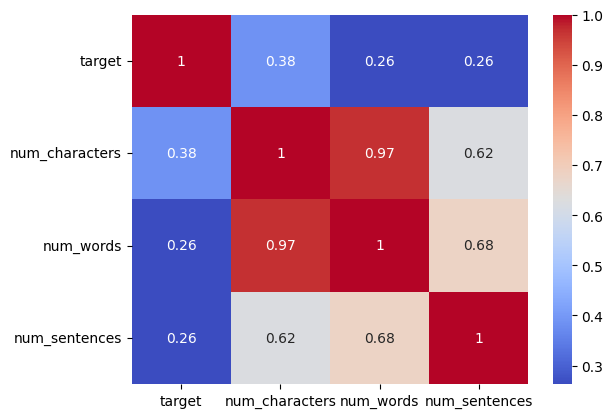

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns (excluding 'text')
numeric_df = df.select_dtypes(include=['int32', 'int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


# 3. Data Preprocessing
     . Lower case 
     . Tokenization
     . Removing special charachers
     . Removing stop words and punctuation
     . Stemming


In [42]:
 def transform_text(text):
        text = text.lower()
        text = nltk.word_tokenize(text)
        
        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
        
        text = y[:]
        y.clear()
        
        for i in text:
            y.append(ps.stem(i))
        
        return " ".join(y)

In [45]:
import nltk

In [58]:
# nltk.download('stopwords')

In [55]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [57]:
# from nltk.corpus import stopwords
# stopwords.words('english')

In [59]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [60]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [62]:
df['transformed_text'] = df['text'].apply(transform_text)

In [63]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [65]:
 # !pip install wordcloud

In [66]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [67]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

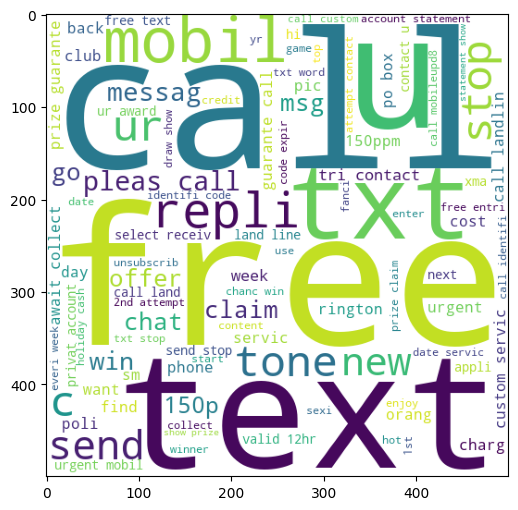

In [68]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [69]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

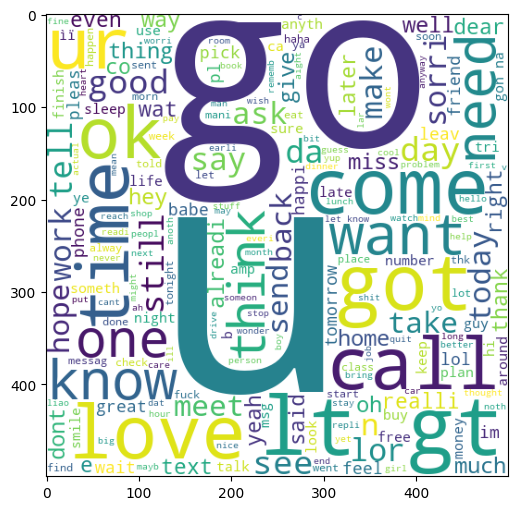

In [70]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [71]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [72]:
# Initialize an empty list to store spam words
spam_corpus = []

# Iterate over the messages where target is 1 (spam)
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)  

In [73]:
len(spam_corpus)

9939

In [74]:
!pip install Counter

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5424 sha256=6b8d856dd02d4d9ac8ae1bbaf5bc4b51b7a3cf8f7ea1ae154bb73a03e25c0f0f
  Stored in directory: c:\users\sumit kumar thakur\appdata\local\pip\cache\wheels\8c\53\bd\a2a81742d0585769e6f7304ccafdd9d85b828371602b103728
Successfully built Counter


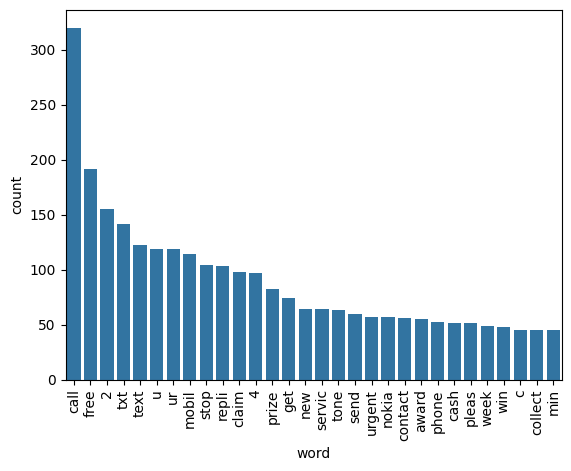

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming your DataFrame df is already loaded and contains the columns 'target' and 'transformed_text'

# Initialize an empty list to store spam words
spam_corpus = []

# Iterate over the messages where target is 1 (spam)
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)  # Correct usage of append

# Get the 30 most common words in the spam corpus
common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot using x and y arguments
sns.barplot(x='word', y='count', data=common_words)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [76]:
# Initialize an empty list to store spam words
ham_corpus = []

# Iterate over the messages where target is 1 (spam)
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [77]:
len(ham_corpus)

35404

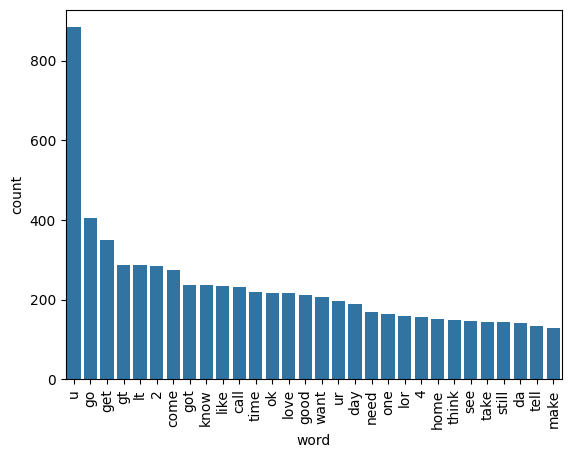

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Assuming your DataFrame df is already loaded and contains the columns 'target' and 'transformed_text'

# Initialize an empty list to store spam words
ham_corpus = []

# Iterate over the messages where target is 1 (ham)
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word) # Correct usage of append

# Get the 30 most common words in the spam corpus
common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the barplot using x and y arguments
sns.barplot(x='word', y='count', data=common_words)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


In [79]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [81]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [82]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [83]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [84]:
x.shape

(5169, 3000)

In [85]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
y = df['target'].values

In [87]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [90]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [92]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [93]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [94]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [95]:
# tfidf ---> mnb

In [97]:
 ! pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.8/124.9 MB 4.8 MB/s eta 0:00:26
    --------------------------------------- 2.9/124.9 MB 5.2 MB/s eta 0:00:24
   - -------------------------------------- 3.7/124.9 MB 5.3 MB/s eta 0:00:23
   - -------------------------------------- 3.7/124.9 MB 5.3 MB/s eta 0:00:23
   - -------------------------------------- 3.7/124.9 MB 5.3 MB/s eta 0:00:23
   - -------------------------------------- 3.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 3.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 3.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 3.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 3.9/124.9 MB 2.7 MB/s eta 0:00:46
   - -------------------------------------- 4.2/124.9 MB 1.7 MB/s eta 0

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [104]:
from sklearn.ensemble import AdaBoostClassifier

# Change the algorithm to SAMME
model = AdaBoostClassifier(algorithm='SAMME', n_estimators=50)


In [105]:
svc =SVC(kernel='sigmoid',gamma=1.0) 
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [106]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' :mnb,
    'DT' :dtc,
    'LR' :lrc,
    'RF' :rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
} 

In [107]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [108]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [109]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy -",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy - 0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy - 0.9052224371373307
Precision -  1.0
For  NB
Accuracy - 0.9709864603481625
Precision -  1.0
For  DT
Accuracy - 0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy - 0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy - 0.9758220502901354
Precision -  0.9829059829059829


C:\Users\SUMIT KUMAR THAKUR\anaconda3\envs\myenv\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy - 0.960348162475822
Precision -  0.9292035398230089
For  Bgc
Accuracy - 0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy - 0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy - 0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy - 0.9671179883945842
Precision -  0.9262295081967213


In [110]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [111]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,Bgc,0.958414,0.868217


In [112]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [113]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,Bgc,Accuracy,0.958414


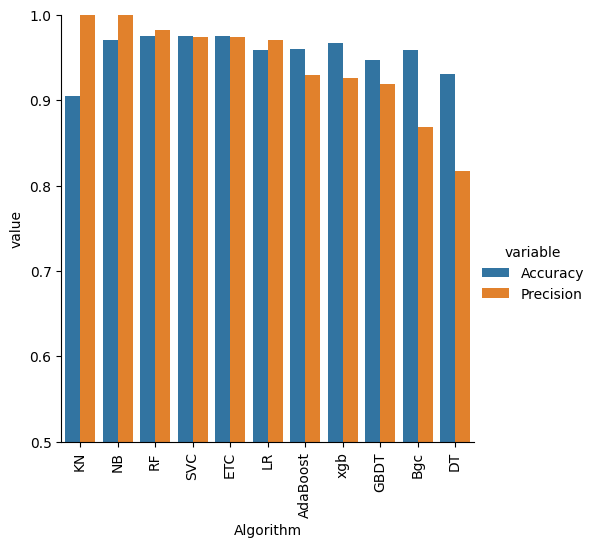

In [114]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [115]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [116]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [117]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [118]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [119]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [120]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [121]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,Bgc,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [122]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [124]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [125]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [126]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [127]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [128]:
from sklearn.ensemble import StackingClassifier

In [129]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [130]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9615384615384616


In [131]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [132]:

import pickle

# Load the model using pickle
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Check the type of the loaded model
print(type(model))  # Ensure the file loads properly


<class 'sklearn.naive_bayes.MultinomialNB'>


In [133]:

import pickle

with open('vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

print(type(vectorizer))  # Ensure the file loads properly



<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [134]:
 # Assuming you have training data `x_train` (features) and `y_train` (labels)
model = MultinomialNB()

# Fit the model on the training data
model.fit(x_train, y_train)

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [135]:
# Example SMS input (could also use user input if needed)
input_sms = "Congratulations! You've won a free iPhone!"

# Now transform and predict
vector_input = tfidf.transform([input_sms])  # Transform the input with the loaded vectorizer
result = model.predict(vector_input)[0]


In [136]:
input_sms = input("Enter the SMS text to classify: ")

# Transform and predict
vector_input = tfidf.transform([input_sms])  # Transform the input
result = model.predict(vector_input)[0]

print(f'The SMS is classified as: {"Spam" if result == 1 else "Not Spam"}')


Enter the SMS text to classify:  Free entry in 2 a wkly comp to win FA Cup fina...


The SMS is classified as: Spam


In [137]:
import sklearn
print(sklearn.__version__)

1.5.1


In [1]:
import sys
print(sys.executable)

C:\Users\SUMIT KUMAR THAKUR\anaconda3\envs\myenv\python.exe


In [3]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
